In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [ ]:
n_regen = 10
n_collection = 1

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_2.csv'
schedule = 'scheduled'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
i=10
while i < 100:
    n_regen = i
    Total_Energy_m3, Total_GHG_m3 = Run_LCA_model(buildings_path, n_regen, n_collection, schedule)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    i = i+20

In [29]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1))- Result_GHG_m3["n_facilities"]

In [98]:
Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

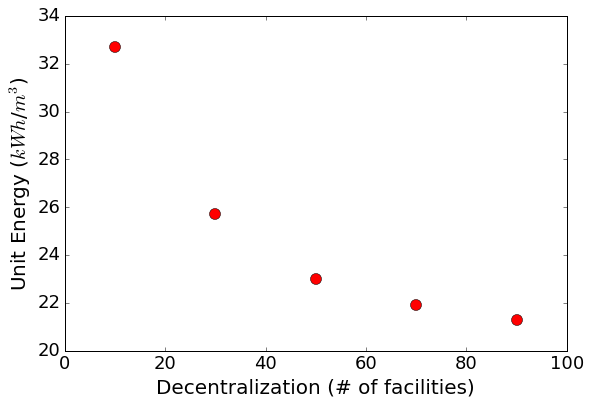

In [99]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

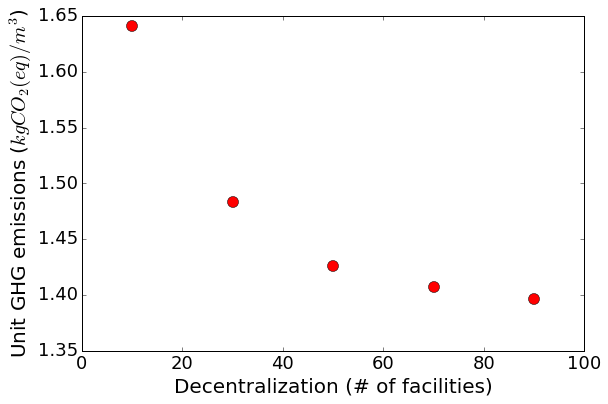

In [100]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

In [101]:
Result_Energy_m3_plot = Result_Energy_m3[1:2].drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3[1:2].drop('sum',1).drop('n_facilities',1)

In [102]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Unnamed: 0','Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Unnamed: 0', 'Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

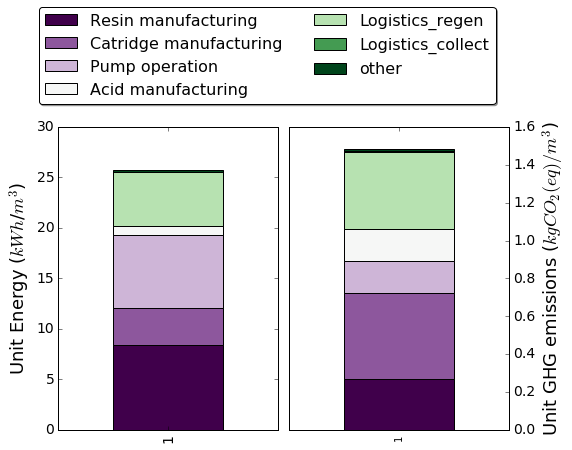

In [107]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Result_Energy_m3_plot.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Result_GHG_m3_plot.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()